## 🧭 Notebook Overview: How It Works

This notebook follows a structured Six-part pipeline to explore, clean, and model airline fare data. It combines data intuition with practical machine learning steps, and is designed to support both analysis and reproducibility.

---

### 🟩 Part A: Introduction & Setup
- Imported core **libraries** (`pandas`, `numpy`, visual tools)
- Loaded the **airline dataset**
- Performed basic checks to understand **shape, columns, and data types**

---

### 📊 Part B: Exploratory Data Analysis (EDA)
- Explored **distributions** and missing values
- Visualized and analyzed **key features**
- Identified **hidden patterns** and the target variable (`fare`)
- Gained insight into relationships between variables (e.g., coordinates, carriers, costs)

---

### 🧹 Part C: Data Preprocessing
- Cleaned missing geocoordinates using **mean city-based imputation**
- Removed **rows with fully missing carrier/fare data**
- Transformed or encoded **categorical columns**
- Dropped **redundant features** to reduce noise
- Prepared the dataset for both **linear and tree-based modeling**

---

### 🌡️ Part D: Modeling & Evaluation
- Applied **Linear Models**: 
  - Linear Regression, Ridge, Lasso, ElasticNet
  - Analyzed **coefficients** to interpret feature influence
- Applied **Tree-based Models**: 
  - Random Forest, XGBoost, CatBoost, LightGBM, Gradient Boosting, Extra Trees
  - Used **feature importance** to interpret the models

### 🏹 Part E: Cross Validation
- Used **Cross-Validation** to compare model performance
- Prepared the ground for final selection or deployment

### 🗺️ Part F: Summary
- Brief overview of data cleaning, modeling, and interpretability approach for fare  prediction.
---

This pipeline ensures a clear flow from raw data to machine learning insights.


##### About Dataset 
-- (https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024/data)
This dataset provides detailed information on airline flight routes, fares, and passenger volumes within the United States from 1993 to 2024. The data includes metrics such as the origin and destination cities, distances between airports, the number of passengers, and fare information segmented by different airline carriers. It serves as a comprehensive resource for analyzing trends in air travel, pricing, and carrier competition over a span of three decades
### Potential Uses:
- Market Analysis: Assess trends in air travel demand, fare changes, and market share of airlines over time.
- Price Optimization: Develop models to predict optimal pricing strategies for airlines.
- Route Planning: Identify profitable routes and underserved markets for new route planning.
- Economic Studies: Analyze the economic impact of air travel on different cities and regions.
- Travel Behavior Research: Study changes in passenger preferences and travel behavior over the years.
- Competitor Analysis: Evaluate the performance of different airlines on various routes.

### ✈️ Feature Descriptions

- `tbl`: Table identifier.
- `Year`: Year of the data record.
- `quarter`: Quarter of the year (1 to 4).
- `citymarketid_1`: Origin city market ID.
- `citymarketid_2`: Destination city market ID.
- `city1`: Origin city name.
- `city2`: Destination city name.
- `airportid_1`: Origin airport ID.
- `airportid_2`: Destination airport ID.
- `airport_1`: Origin airport code.
- `airport_2`: Destination airport code.
- `nsmiles`: Distance between airports in miles.
- `passengers`: Number of passengers.
- `fare`: Average fare for the route.
- `carrier_lg`: Code for the largest carrier by passengers.
- `large_ms`: Market share of the largest carrier.
- `fare_lg`: Average fare of the largest carrier.
- `carrier_low`: Code for the lowest fare carrier.
- `lf_ms`: Market share of the lowest fare carrier.
- `fare_low`: Lowest fare on the route.
- `Geocoded_City1`: Geocoded coordinates for the origin city.
- `Geocoded_City2`: Geocoded coordinates for the destination city.
- `tbl1apk`: Unique identifier for airlines on various routes.
ines on various routes

In [4]:
# ✈️ Airline Project

## 🧰 1. Library Imports

"""
This project uses a variety of libraries for data handling, visualization, preprocessing, and model development.

📦 Built-in Libraries:
- warnings: To suppress unwanted warnings.
- ast, re: For parsing and regular expressions.

📊 Data Handling:
- numpy: Numerical operations.
- pandas: Data manipulation and analysis.

📈 Visualization:
- matplotlib.pyplot: Base plotting.
- matplotlib.ticker: Tick control for axes.
- seaborn: Advanced visualizations.

🔄 Preprocessing & Encoding:
- category_encoders: Categorical encoding.
- sklearn.preprocessing: Label and feature scaling.

🧪 Model Selection & Evaluation:
- sklearn.model_selection: Cross-validation and data splitting.
- sklearn.metrics: Regression metrics like MAE, RMSE, and R².

🧮 Linear Models:
- ElasticNetCV, LassoCV, RidgeCV, LinearRegression: Regularized linear models.

🌲 Ensemble Models:
- RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, 
  HistGradientBoostingRegressor, StackingRegressor: Tree-based and stacking ensemble methods.

🚀 Boosting Libraries:
- LightGBM (LGBMRegressor)
- XGBoost (XGBRegressor)
- CatBoost (CatBoostRegressor, Pool)

🧹 Warnings:
All warnings are suppressed for cleaner output.
"""

# Built-ins
import warnings
import ast
import re

# Data handling
import numpy as np
import pandas as pd
import zipfile

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter, FixedLocator
import seaborn as sns

# Preprocessing & encoding
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model selection & evaluation
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear models
from sklearn.linear_model import ElasticNetCV, LassoCV, LinearRegression, RidgeCV

# Ensemble models
from sklearn.ensemble import (
    ExtraTreesRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    StackingRegressor
)

# Boosting libraries
import lightgbm as lgb
from lightgbm import LGBMRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool

# Suppress warnings
warnings.filterwarnings("ignore")


## 📁 Part B.. Data Loading & Initial Exploration

After extracting the dataset, we begin with a quick look at its structure and contents.

### 📄 Basic Data Info
We use `.info()` to understand the number of entries, data types, and missing values in each column..info()


In [6]:

# File path to the ZIP file inside the data folder
zip_path = os.path.join("..", "data", "US Airline Flight Routes and Fares 1993-2024.zip")

# Dictionary to store CSV DataFrames
dataframes = {}

# Opening the ZIP file correctly
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if file_name.endswith(".csv"):
            try:
                with zip_ref.open(file_name) as file:
                    df = pd.read_csv(file)
                    key = file_name.replace(".csv", "")
                    dataframes[key] = df
                    print(f"✅ Loaded '{file_name}' successfully! Shape: {df.shape}")
            except Exception as e:
                print(f"❌ Failed to load '{file_name}': {e}")

# Summary of loaded files
for name, df in dataframes.items():
    print(f"{name}: {df.shape}")


✅ Loaded 'US Airline Flight Routes and Fares 1993-2024.csv' successfully! Shape: (245955, 23)
US Airline Flight Routes and Fares 1993-2024: (245955, 23)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [8]:
# Drop redundant columns 
df.drop(columns=[ 'tbl','tbl1apk'], inplace=True)

## 🛠️ Part C. Preprocessing

## 🌐 1. Location Data Cleaning & Feature Engineering

The dataset contains geographic columns (`Geocoded_City1`, `Geocoded_City2`, `city1`, `city2`) which initially store mixed-format text including city names, states, and coordinates. To prepare these for analysis and modeling, we perform the following cleaning and feature extraction steps:#

### 🏙️ Step 1: Extract Location Components
- From `Geocoded_City1` and `Geocoded_City2`, extract:
  - **City details** (text before newline).
  - **Latitude** and **longitude** values using regular expressions.
- Convert coordinate strings to floats for numerical processing.

In [10]:
# Extract city details (excluding coordinates) for Geocoded_City1
df['city_detail_1'] = df['Geocoded_City1'].str.extract(r'^(.*?)(?:\\n)')

# Extract latitude and longitude for Geocoded_City1
df[['latitude_city1', 'longitude_city1']] = df['Geocoded_City1'].str.extract(r'\(([-\d.]+),\s*([-\d.]+)\)')
df['latitude_city1'] = df['latitude_city1'].astype(float)
df['longitude_city1'] = df['longitude_city1'].astype(float)

# Extract city details for Geocoded_City2
df['city_detail_2'] = df['Geocoded_City2'].str.extract(r'^(.*?)(?:\\n)')

# Extract latitude and longitude for Geocoded_City2
df[['latitude_city2', 'longitude_city2']] = df['Geocoded_City2'].str.extract(r'\(([-\d.]+),\s*([-\d.]+)\)')
df['latitude_city2'] = df['latitude_city2'].astype(float)
df['longitude_city2'] = df['longitude_city2'].astype(float)

# Display the extracted data along with the original columns
#print(df[['Geocoded_City1', 'city_detail_1', 'latitude_city1', 'longitude_city1', 'Geocoded_City2', 'city_detail_2', 'latitude_city2', 'longitude_city2']].head())


#### 🗺️ Step 2: Separate City and State

In [12]:
# Extract state information from city columns and create new state columns
df['State1'] = df['city1'].apply(lambda x: re.findall(r', (.*)', x)[0] if pd.notnull(x) else None)
df['State2'] = df['city2'].apply(lambda x: re.findall(r', (.*)', x)[0] if pd.notnull(x) else None)

# Remove state names from city columns
df['city1'] = df['city1'].apply(lambda x: re.sub(r', .*', '', x) if pd.notnull(x) else x)
df['city2'] = df['city2'].apply(lambda x: re.sub(r', .*', '', x) if pd.notnull(x) else x)

# # Display results
# print("State1 column created:\n", df['State1'].head())
# print("State2 column created:\n", df['State2'].head())
# print("Updated city1 column:\n", df['city1'].head())
# print("Updated city2 column:\n", df['city2'].head())


#### 🗑️ Step 3: Drop Temporary Columns

In [14]:
df.drop(columns=['city_detail_1', 'city_detail_2'], inplace=True)

# Display the remaining columns
df.columns

Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'airportid_1', 'airportid_2', 'airport_1', 'airport_2', 'nsmiles',
       'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'latitude_city1', 'longitude_city1', 'latitude_city2',
       'longitude_city2', 'State1', 'State2'],
      dtype='object')

#### 🧽 Step 4: Clean Text Artifacts

In [16]:
# Remove '(Metropolitan Area)' from State1 and State2 columns
df['State1'] = df['State1'].str.replace(' \(Metropolitan Area\)', '', regex=True)
df['State2'] = df['State2'].str.replace(' \(Metropolitan Area\)', '', regex=True)

# Display results
print("Updated State1 column:\n", df['State1'].value_counts())
print("Updated State2 column:\n", df['State2'].value_counts())


Updated State1 column:
 State1
TX    36012
CA    31132
NY    28453
MA    23576
IL    18456
OH    17248
FL    15405
MI     5868
NC     5798
CO     4916
TN     4610
GA     4562
SC     4424
MO     3747
NV     3488
AL     3207
NM     3197
WI     2733
IN     2621
AZ     2362
CT     2038
VA     1999
OR     1875
AR     1864
LA     1862
KY     1828
IA     1743
MN     1722
PA     1560
ID     1176
OK     1000
WA      959
NE      877
UT      800
VT      715
MS      417
DC      392
ME      373
MT      342
NJ      302
WY      159
ND      133
SD        2
WV        2
Name: count, dtype: int64
Updated State2 column:
 State2
CA    50008
NY    40090
DC    31623
FL    28572
TX    15289
VA     7924
AZ     7846
PA     5392
MO     5083
WA     4785
OK     4163
TN     4082
NC     3990
OH     3477
NV     3463
OR     3329
UT     2890
IL     2779
MN     2303
NE     2265
LA     2145
WI     1969
KY     1607
CO     1315
MI     1312
GA     1286
IN     1240
MA     1110
SC     1078
AR      746
ME      658
CT      640


## 🧩 2. Imputation of Missing Geocoordinates

After extracting and cleaning geographic coordinates, we address missing values in the latitude and longitude columns. Since many listings belong to the same city, we leverage the **mean coordinates** of each city (`city1` and `city2`) to fill in the gaps.

The imputation is carried out in **four complementary steps**, accounting for possible gaps in either of the city coordinate sets.

---

### 📍 Step 1: Impute Missing `latitude_city1` and `longitude_city1` Using `city1` Averages

We calculate the mean coordinates for each `city1` and apply them wherever values are missing in the `latitude_city1` or `longitude_city1` columns.


In [18]:
# Calculate the mean latitude and longitude for each city
city_coords = df.groupby('city1')[['latitude_city1', 'longitude_city1']].mean()

# Define a function to impute missing values
def impute_coords(row):
    if pd.isnull(row['latitude_city1']) or pd.isnull(row['longitude_city1']):
        return city_coords.loc[row['city1'], 'latitude_city1'], city_coords.loc[row['city1'], 'longitude_city1']
    else:
        return row['latitude_city1'], row['longitude_city1']

# Apply the function to each row
df[['latitude_city1', 'longitude_city1']] = df.apply(impute_coords, axis=1, result_type='expand')

# Check for remaining missing values
print(df[['latitude_city1', 'longitude_city1']].isnull().sum())


latitude_city1     27
longitude_city1    27
dtype: int64


#### 📍 Step 2: Impute Missing 

`latitude_city2` and `longitude_city2` Using `city2` Averages

In [20]:
# Calculate the mean latitude and longitude for each city2
city2_coords = df.groupby('city2')[['latitude_city2', 'longitude_city2']].mean()

# Define a function to impute missing values for city2
def impute_coords_city2(row):
    if pd.isnull(row['latitude_city2']) or pd.isnull(row['longitude_city2']):
        return city2_coords.loc[row['city2'], 'latitude_city2'], city2_coords.loc[row['city2'], 'longitude_city2']
    else:
        return row['latitude_city2'], row['longitude_city2']

# Apply the function to each row for city2
df[['latitude_city2', 'longitude_city2']] = df.apply(impute_coords_city2, axis=1, result_type='expand')

# Check for remaining missing values in city2 coordinates
print(df[['latitude_city2', 'longitude_city2']].isnull().sum())


latitude_city2     39
longitude_city2    39
dtype: int64


####  🔁 Step 3: Backup Imputation of

`latitude_city1`,`longitude_city1` Using `city2` CoordinatesOrdinal Coding for flight type

In [22]:
# Calculate the mean latitude and longitude for each city
city_coords = df.groupby('city2')[['latitude_city1', 'longitude_city1']].mean()

# Define a function to impute missing values
def impute_coords(row):
    if pd.isnull(row['latitude_city1']) or pd.isnull(row['longitude_city1']):
        return city_coords.loc[row['city2'], 'latitude_city1'], city_coords.loc[row['city2'], 'longitude_city1']
    else:
        return row['latitude_city1'], row['longitude_city1']

# Apply the function to each row
df[['latitude_city1', 'longitude_city1']] = df.apply(impute_coords, axis=1, result_type='expand')

# Check for remaining missing values
print(df[['latitude_city1', 'longitude_city1']].isnull().sum())


latitude_city1     0
longitude_city1    0
dtype: int64


#### 🔁 Step 4: Backup Imputation of 

`latitude_city2`,`longitude_city2`,`longitude_city2` Using `city1` Coordinates

In [24]:
# Calculate the mean latitude and longitude for each city2
city2_coords = df.groupby('city1')[['latitude_city2', 'longitude_city2']].mean()

# Define a function to impute missing values for city2
def impute_coords_city2(row):
    if pd.isnull(row['latitude_city1']) or pd.isnull(row['longitude_city2']):
        return city2_coords.loc[row['city1'], 'latitude_city2'], city2_coords.loc[row['city1'], 'longitude_city2']
    else:
        return row['latitude_city2'], row['longitude_city2']

# Apply the function to each row for city2
df[['latitude_city2', 'longitude_city2']] = df.apply(impute_coords_city2, axis=1, result_type='expand')

# Check for remaining missing values in city2 coordinates
print(df[['latitude_city2', 'longitude_city2']].isnull().sum())


latitude_city2     0
longitude_city2    0
dtype: int64


### 🧹 3. Cleaning Carrier & Fare Data + Column Reduction

After handling geocoordinates, we shift focus to the **carrier and fare-related features**, where several rows contain missing values across key metrics. To maintain data integrity and improve model readiness, we follow a structured cleaning process and remove redundant identifiers.

This section includes **four systematic steps**:

---

##### 🔍 Step 1: Identify Fully Null Rows in Key Carrier & Fare Columns

We first check if there are any rows where **all six important columns** are missing:

- `carrier_lg`, `large_ms`, `fare_lg`  
- `carrier_low`, `lf_ms`, `fare_low`

---

##### 🧹 Step 2: Drop Rows with All Six Values Missing

Rows that have no data in any of the above six columns are considered **uninformative** and are dropped.

---

##### ➕ Step 3: Additional Filter on Low-Cost Metrics

We further clean the dataset by removing rows that are missing **all three low-cost carrier metrics**:

- `carrier_low`, `lf_ms`, `fare_low`

---

##### 🗑️ Step 4: Drop Redundant Location Identifiers

With geocoordinates and city names already processed, we remove **unnecessary columns** such as:

- `citymarketid_1`, `citymarketid_2`, `city1`, `State1`, `city2`, `State2`  
- `airport_1`, `airport_2`, `Geocoded_City1`, `Geocoded_City2`

---

##### ✅ Final Check

To validate the cleaning steps, we display the **remaining null value counts** in the DataFrame.


In [26]:
# Code #3: Check if the same rows have null values across specific columns
null_rows = df[df[['carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low']].isnull().all(axis=1)]

# Display the rows with all null values in these columns
print(null_rows)

# Code #4: Drop rows where all specified columns have NaN values
df = df.dropna(subset=['carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low'], how='all')

# # Verify that null rows are dropped
# print(df.isnull().sum())

# Code #5: Drop rows where all specified columns have NaN values (additional filtering)
df = df.dropna(subset=[ 'carrier_low', 'lf_ms', 'fare_low'], how='all')

# Code #6: Drop redundant columns that are no longer needed
columns_to_drop = [
    'citymarketid_1', 'citymarketid_2', 'city1', 'State1', 'city2', 'State2', 'airport_1',
    'airport_2','Geocoded_City1','Geocoded_City2'
]

df.drop(columns=columns_to_drop, inplace=True)

# Verify that null rows are dropped and columns removed
print(df.isnull().sum())


        Year  quarter  citymarketid_1  citymarketid_2          city1  \
2607    2021        4           30721           31703         Boston   
5948    1997        1           31453           32896        Houston   
5970    2002        3           31703           34570  New York City   
6035    2006        3           32211           34614      Las Vegas   
6043    2002        1           32211           32575      Las Vegas   
...      ...      ...             ...             ...            ...   
244589  2024        1           30721           31703         Boston   
245312  2024        1           31703           35096  New York City   
245452  2024        1           32457           34689  San Francisco   
245595  2024        1           32575           31703    Los Angeles   
245885  2024        1           34004           32575        Everett   

                 city2  airportid_1  airportid_2 airport_1 airport_2  ...  \
2607     New York City        14307        12478       PVD

### 🛫 4. **Airport IDs Conversion to Categorical Types**

In this step, we are optimizing our data by converting the airport identifiers (`airportid_1` and `airportid_2`) into categorical types. This process serves multiple purposes:

- **Reduce memory usage**: By converting these columns into categorical types, we minimize the memory footprint, making the data more manageable, especially as the dataset grows.
- **Preparation for encoding**: Categorical data can be encoded later (for models like Decision Trees or Neural Networks) to handle airport IDs as distinct categories, enabling better model interpretation.
  
Though the values are not inherently numerical, converting these IDs into categories helps Python recognize them as distinct groups, which is vital for our subsequent model training.


In [28]:
# Convert airport IDs to categorical types
df['airportid_1'] = df['airportid_1'].astype('category')
df['airportid_2'] = df['airportid_2'].astype('category')

### 🧑‍💻 5. **Target Encoding for Carrier Features**

For the next step in preparing categorical data, we apply **Target Encoding** to the `carrier_lg` and `carrier_low` columns. This method of encoding has a clear purpose:

- **Encoding Strategy**: Instead of applying a one-hot encoding (which could increase dimensionality), target encoding converts each category into a value based on the **mean of the target variable (`fare`)** for that category. This is useful when:
  - There are a large number of categories in the feature.
  - You want to retain the **relationship between the feature and the target variable** directly, which is often helpful in linear models or tree-based algorithms.
  
By performing target encoding, we ensure that the categorical features `carrier_lg` and `carrier_low` are numerically represented based on how they relate to `fare`. This method helps the model recognize the importance of these features with respect to the target.


In [30]:
# Create the encoder for target encoding
encoder = ce.TargetEncoder(cols=['carrier_lg', 'carrier_low'])

# Fit and transform the data with the encoder
df_encoded = encoder.fit_transform(df, df['fare'])

# Check the encoded values
print(df_encoded[['carrier_lg', 'carrier_low']].head())


   carrier_lg  carrier_low
0  116.353504   133.204837
1  233.523877   242.084995
2  195.194414   205.687549
3  249.183390   242.595346
4  195.194414   242.595346


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244343 entries, 0 to 245954
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   Year             244343 non-null  int64   
 1   quarter          244343 non-null  int64   
 2   airportid_1      244343 non-null  category
 3   airportid_2      244343 non-null  category
 4   nsmiles          244343 non-null  int64   
 5   passengers       244343 non-null  int64   
 6   fare             244343 non-null  float64 
 7   carrier_lg       244343 non-null  object  
 8   large_ms         244343 non-null  float64 
 9   fare_lg          244343 non-null  float64 
 10  carrier_low      244343 non-null  object  
 11  lf_ms            244343 non-null  float64 
 12  fare_low         244343 non-null  float64 
 13  latitude_city1   244343 non-null  float64 
 14  longitude_city1  244343 non-null  float64 
 15  latitude_city2   244343 non-null  float64 
 16  longitude_city2  244343 n

## 🤖 Part D. Modeling Airline Fares

After completing an extensive data cleaning and preprocessing pipeline, we now transition into modeling — aiming to predict airline fares (`fare`) using all remaining structured features.

We begin with two key steps to prepare the data for modeling:

1. **Separate the features and the target**:
   - Features (`X`) include all predictors, excluding `fare` and related encoded columns (`carrier_lg`, `carrier_low`).
   - The target (`y`) is the fare value to be predicted.

2. **Split the dataset**:
   - Use an 80/20 **train-test split** to ensure that model performance is evaluated on unseen data.
   - A fixed `random_state` ensures reproducibility.

This setup forms the foundation for all subsequent modeling experiments — from linear regressors to advanced ensemble methods.


### ⛳ 1. **Define Target X and y**

In [34]:
# Separate features and target
X = df.drop(['fare', 'carrier_lg','carrier_low', ], axis=1)
y = df['fare']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 🛹 2. **Linear Modeling**

#### 📊 Step 1: Preparing Data for Linear Modeling

Linear models are sensitive to the scale of input features. Therefore, we begin with essential preparation steps1.ty.

2. **Standardization**:
   - Linear models assume features are on comparable scales.
   - We apply `StandardScaler` to transform features so they have a mean of 0 and standard deviation of 1.
   - The scaler is fit on the training data and applied to both training and testing sets to avoid data leakage.

These steps ensure a fair and stable foundation before training our first linear regression models.


In [36]:
# # Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### 🧠 Step 2: Linear Modeling

##### 📌 Models Trained

In [38]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

# Ridge Regression
ridge = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5)
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)

# ElasticNet Regression
elastic = ElasticNetCV(alphas=np.logspace(-3, 3, 100), l1_ratio=[.1, .5, .9], cv=5)
elastic.fit(X_train_scaled, y_train)
elastic_preds = elastic.predict(X_test_scaled)


def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name} Performance:")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.0f}")   # No decimals to match your formatting
    print(f"RMSE: {rmse:.2f}")


##### 🧮 Evaluation Metrics

In [40]:
# Train Linear Models
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)

lasso = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5)
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)

elastic = ElasticNetCV(alphas=np.logspace(-3, 3, 100), l1_ratio=[.1, .5, .9], cv=5)
elastic.fit(X_train_scaled, y_train)
elastic_preds = elastic.predict(X_test_scaled)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name} Performance:")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.0f}")
    print(f"RMSE: {rmse:.2f}")

# ✅ Call the function for each model
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Ridge Regression", y_test, ridge_preds)
evaluate_model("Lasso Regression", y_test, lasso_preds)
evaluate_model("ElasticNet Regression", y_test, elastic_preds)



Linear Regression Performance:
R2 Score: 0.9401
MAE: 10.76
MSE: 376
RMSE: 19.39

Ridge Regression Performance:
R2 Score: 0.9401
MAE: 10.76
MSE: 376
RMSE: 19.39

Lasso Regression Performance:
R2 Score: 0.9401
MAE: 10.76
MSE: 376
RMSE: 19.39

ElasticNet Regression Performance:
R2 Score: 0.9401
MAE: 10.76
MSE: 376
RMSE: 19.39


#### 📌 Step 3: Interpreting Feature Coefficients

In [42]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear": lr.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_,
    "ElasticNet": elastic.coef_
})
print(coeff_df.sort_values("Linear", key=abs, ascending=False).head(20))


            Feature     Linear      Ridge      Lasso  ElasticNet
7           fare_lg  54.517176  54.495466  54.519754   54.503188
9          fare_low  22.079393  22.093145  22.077203   22.087822
4           nsmiles   4.640199   4.643787   4.638261    4.641328
8             lf_ms  -2.679975  -2.685496  -2.678349   -2.682775
5        passengers  -2.447028  -2.446952  -2.446001   -2.446168
0              Year   1.189515   1.190661   1.188046    1.189210
13  longitude_city2   0.655493   0.655948   0.654023    0.654679
12   latitude_city2   0.510120   0.510524   0.508748    0.509344
1           quarter  -0.416813  -0.417108  -0.415632   -0.416106
11  longitude_city1   0.347562   0.348011   0.345845    0.346549
3       airportid_2  -0.313534  -0.313691  -0.312471   -0.312818
6          large_ms  -0.099081  -0.097700  -0.098857   -0.097885
2       airportid_1   0.038650   0.038418   0.037442    0.037533
10   latitude_city1   0.019631   0.019554   0.019053    0.019122


In [43]:
# Use absolute values to represent importance magnitude
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear %": 100 * np.abs(lr.coef_) / np.sum(np.abs(lr.coef_)),
    "Ridge %": 100 * np.abs(ridge.coef_) / np.sum(np.abs(ridge.coef_)),
    "Lasso %": 100 * np.abs(lasso.coef_) / np.sum(np.abs(lasso.coef_)),
    "ElasticNet %": 100 * np.abs(elastic.coef_) / np.sum(np.abs(elastic.coef_))
})

# Round to 1 decimal place
importance_df = importance_df.round(1)

# Sort by Linear %
importance_df.sort_values("Linear %", ascending=False).head(30)


,Feature,Linear %,Ridge %,Lasso %,ElasticNet %
7,fare_lg,60.6,60.6,60.6,60.6
9,fare_low,24.5,24.6,24.5,24.6
4,nsmiles,5.2,5.2,5.2,5.2
8,lf_ms,3.0,3.0,3.0,3.0
5,passengers,2.7,2.7,2.7,2.7
0,Year,1.3,1.3,1.3,1.3
13,longitude_city2,0.7,0.7,0.7,0.7
12,latitude_city2,0.6,0.6,0.6,0.6
1,quarter,0.5,0.5,0.5,0.5
11,longitude_city1,0.4,0.4,0.4,0.4


In [44]:
# Create coefficient DataFrame
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear": lr.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_,
    "ElasticNet": elastic.coef_
})

# Calculate % importance
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear %": 100 * np.abs(lr.coef_) / np.sum(np.abs(lr.coef_)),
    "Ridge %": 100 * np.abs(ridge.coef_) / np.sum(np.abs(ridge.coef_)),
    "Lasso %": 100 * np.abs(lasso.coef_) / np.sum(np.abs(lasso.coef_)),
    "ElasticNet %": 100 * np.abs(elastic.coef_) / np.sum(np.abs(elastic.coef_))
})

# Merge on 'Feature'
combined_df = pd.merge(coeff_df, importance_df, on="Feature")

# Sort by importance and select top 30
top_features = combined_df.sort_values("Linear %", ascending=False).head(30)

# Format: 4 decimals for coefficients, 2 decimals for percentages
coef_cols = ["Linear", "Ridge", "Lasso", "ElasticNet"]
perc_cols = ["Linear %", "Ridge %", "Lasso %", "ElasticNet %"]

top_features[coef_cols] = top_features[coef_cols].applymap(lambda x: f"{x:.4f}")
top_features[perc_cols] = top_features[perc_cols].applymap(lambda x: f"{x:.2f}")

# Display
display(top_features)


,Feature,Linear,Ridge,Lasso,ElasticNet,Linear %,Ridge %,Lasso %,ElasticNet %
7,fare_lg,54.5172,54.4955,54.5198,54.5032,60.61,60.58,60.62,60.60
9,fare_low,22.0794,22.0931,22.0772,22.0878,24.55,24.56,24.55,24.56
4,nsmiles,4.6402,4.6438,4.6383,4.6413,5.16,5.16,5.16,5.16
8,lf_ms,-2.6800,-2.6855,-2.6783,-2.6828,2.98,2.99,2.98,2.98
5,passengers,-2.4470,-2.4470,-2.4460,-2.4462,2.72,2.72,2.72,2.72
0,Year,1.1895,1.1907,1.1880,1.1892,1.32,1.32,1.32,1.32
13,longitude_city2,0.6555,0.6559,0.6540,0.6547,0.73,0.73,0.73,0.73
12,latitude_city2,0.5101,0.5105,0.5087,0.5093,0.57,0.57,0.57,0.57
1,quarter,-0.4168,-0.4171,-0.4156,-0.4161,0.46,0.46,0.46,0.46
11,longitude_city1,0.3476,0.3480,0.3458,0.3465,0.39,0.39,0.38,0.39


### 🦚 3. **Tree Modeling**

#### 🛠️ Step 1: Encode Categorical Airport IDs

In [47]:
df['airportid_1'] = df['airportid_1'].cat.codes              
df['airportid_2'] = df['airportid_2'].cat.codes              

#### 🔄 Step 2: Redefine Feature Set and Target Variable

In [49]:
# Separate features and target
X = df.drop(['fare', 'carrier_lg','carrier_low', ], axis=1)
y = df['fare']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 🛠️ Step 3: Tree Modeling Initialize

##### 🌡️ Models Trained

##### ⚙️ Model Evaluation 

##### 📈 Model Results 

In [51]:

# -------------------------------
# 1. Initialize models
# -------------------------------
lgb_model = LGBMRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
catboost_model = CatBoostRegressor(random_state=42, verbose=0)
xgb_model = XGBRegressor(random_state=42, enable_categorical=True)
etr_model = ExtraTreesRegressor(random_state=42)
hgb_model = HistGradientBoostingRegressor(random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)

models = {
    'LightGBM': lgb_model,
    'Random Forest': rf_model,
    'CatBoost': catboost_model,
    'XGBoost': xgb_model,
    'ExtraTrees': etr_model,
    'HistGradientBoosting': hgb_model,
    'GradientBoosting': gbr_model
}

# -------------------------------
# 2. Train, predict, and evaluate (with MAE)
# -------------------------------
results = []
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    predictions[name] = preds

    mse = mean_squared_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

df_scores = pd.DataFrame(results).sort_values(by='RMSE')

# -------------------------------
# 3. Feature Importance
# -------------------------------
# HistGradientBoosting not included in importance_models it lacks native feature_importance_ attribute

importance_models = {
    'CatBoost': catboost_model.get_feature_importance(),
    'LightGBM': lgb_model.booster_.feature_importance(),
    'XGBoost': [xgb_model.get_booster().get_score(importance_type='weight').get(f, 0) for f in X_train.columns],
    'RandomForest': rf_model.feature_importances_,
    'ExtraTrees': etr_model.feature_importances_,
    'GradientBoosting': gbr_model.feature_importances_,
}

importance_df = pd.DataFrame({'Feature': X_train.columns})
for model_name, importances in importance_models.items():
    importance_df[model_name] = importances

# Normalize
for model in importance_models:
    total = importance_df[model].sum()
    importance_df[model] = (importance_df[model] / total) * 100

# Average & Sort
importance_df['Average'] = importance_df[list(importance_models.keys())].mean(axis=1)
importance_df_sorted = importance_df.sort_values(by='Average', ascending=False)
importance_df_sorted.to_csv('cached_feature_importance.csv', index=False)

# -------------------------------
# 4. Display  Ready
# -------------------------------

display(df_scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2356
[LightGBM] [Info] Number of data points in the train set: 195474, number of used features: 14
[LightGBM] [Info] Start training from score 218.398326
LightGBM - MAE: 7.7357, MSE: 290.7522, RMSE: 17.0515, R²: 0.9536
Random Forest - MAE: 7.0073, MSE: 237.8478, RMSE: 15.4223, R²: 0.9621
CatBoost - MAE: 7.2973, MSE: 279.0227, RMSE: 16.7040, R²: 0.9555
XGBoost - MAE: 7.5093, MSE: 282.3037, RMSE: 16.8019, R²: 0.9550
ExtraTrees - MAE: 6.8916, MSE: 229.2783, RMSE: 15.1419, R²: 0.9634
HistGradientBoosting - MAE: 7.7871, MSE: 296.9334, RMSE: 17.2318, R²: 0.9526
GradientBoosting - MAE: 8.6778, MSE: 284.0662, RMSE: 16.8543, R²: 0.9547


,Model,MAE,MSE,RMSE,R2
4,ExtraTrees,6.891625,229.278275,15.141938,0.963427
1,Random Forest,7.007286,237.847809,15.422315,0.962060
2,CatBoost,7.297336,279.022674,16.703972,0.955492
3,XGBoost,7.509330,282.303672,16.801895,0.954969
6,GradientBoosting,8.677822,284.066211,16.854264,0.954688
0,LightGBM,7.735687,290.752228,17.051458,0.953621
5,HistGradientBoosting,7.787146,296.933414,17.231756,0.952635


#### 📊 Step 4 : Tree Modeling Vizualization

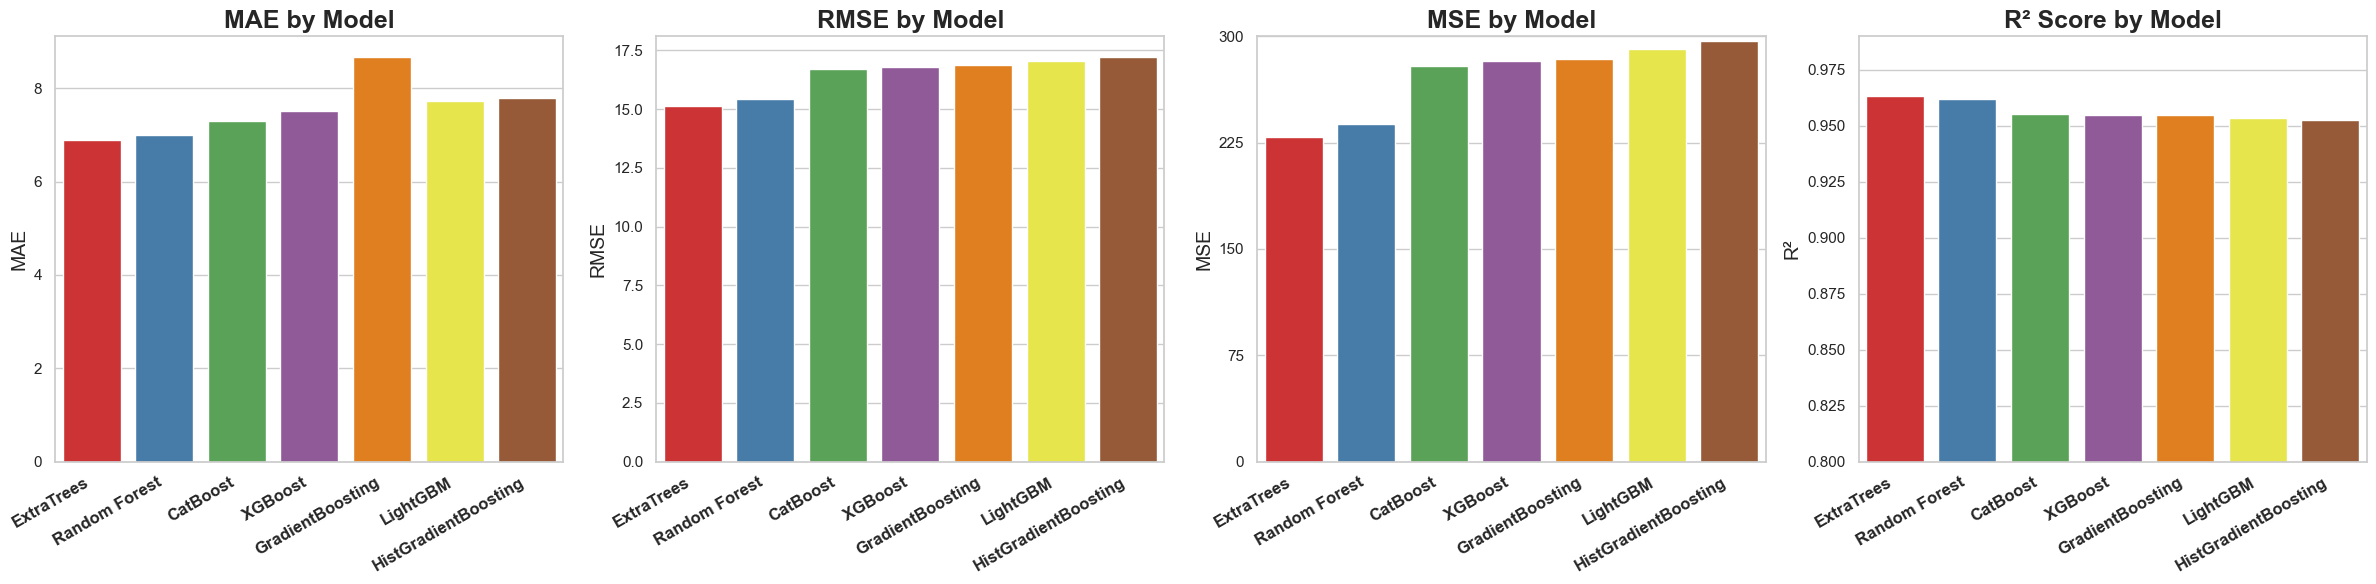

In [53]:
# Style
sns.set(style="whitegrid")

# Color Palette
model_palette = sns.color_palette('Set1', n_colors=len(df_scores['Model']))

# Setup
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
label_fontsize = 12
ylabel_fontsize = 14
title_fontsize = 18

# Helper for styling x-ticks
def style_xticks(ax):
    ax.set_xticklabels(df_scores['Model'], rotation=30, ha='right', fontsize=label_fontsize, fontweight='bold')

# MAE
sns.barplot(x='Model', y='MAE', data=df_scores, palette=model_palette, ax=axes[0])
axes[0].set_title('MAE by Model', fontsize=title_fontsize, fontweight='bold')
axes[0].set_ylabel('MAE', fontsize=ylabel_fontsize)
axes[0].set_xlabel('')
style_xticks(axes[0])

# RMSE
sns.barplot(x='Model', y='RMSE', data=df_scores, palette=model_palette, ax=axes[1])
axes[1].set_title('RMSE by Model', fontsize=title_fontsize, fontweight='bold')
axes[1].set_ylabel('RMSE', fontsize=ylabel_fontsize)
axes[1].set_xlabel('')
style_xticks(axes[1])

# MSE
sns.barplot(x='Model', y='MSE', data=df_scores, palette=model_palette, ax=axes[2])
axes[2].set_title('MSE by Model', fontsize=title_fontsize, fontweight='bold')
axes[2].set_ylabel('MSE', fontsize=ylabel_fontsize)
axes[2].set_xlabel('')
axes[2].set_ylim(0, 300)
axes[2].yaxis.set_major_locator(ticker.FixedLocator([0, 75, 150, 225, 300]))
axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
style_xticks(axes[2])

# R²
sns.barplot(x='Model', y='R2', data=df_scores, palette=model_palette, ax=axes[3])
axes[3].set_title('R² Score by Model', fontsize=title_fontsize, fontweight='bold')
axes[3].set_ylabel('R²', fontsize=ylabel_fontsize)
axes[3].set_xlabel('')
axes[3].set_ylim(0.8, 0.99)
style_xticks(axes[3])

plt.tight_layout()
plt.show()


#### ⚖️ Step 5: Interpretation of Feature Importance

In [55]:
# Extract feature importances
models = {
    'CatBoost': catboost_model.get_feature_importance(),
    'LightGBM': lgb_model.booster_.feature_importance(),
    'XGBoost': [xgb_model.get_booster().get_score(importance_type='weight').get(f, 0) for f in X_train.columns],
    'RandomForest': rf_model.feature_importances_,
    'ExtraTrees': etr_model.feature_importances_,
    'GradientBoosting': gbr_model.feature_importances_,
}

# Create DataFrame
importance_df = pd.DataFrame({'Feature': X_train.columns})
for model_name, importances in models.items():
    importance_df[model_name] = importances

# Normalize to percentage
for model in models.keys():
    total = importance_df[model].sum()
    importance_df[model] = (importance_df[model] / total) * 100

# Add average and sort
importance_df['Average'] = importance_df[list(models.keys())].mean(axis=1)
importance_df_sorted = importance_df.sort_values(by='Average', ascending=False)

# Save for future use in visualizations
importance_df_sorted.to_csv('cached_feature_importance.csv', index=False)

# Display
print(importance_df_sorted.drop(columns='Average').round(2))


            Feature  CatBoost  LightGBM  XGBoost  RandomForest  ExtraTrees  \
7           fare_lg     60.52     18.23    15.41         90.11       41.29   
9          fare_low     18.84     12.87    10.89          4.76       35.37   
4           nsmiles      3.03     10.50     9.27          0.68       16.64   
6          large_ms      4.20     12.47    13.79          1.20        1.02   
5        passengers      2.98     10.53    10.50          0.72        0.57   
0              Year      2.65     10.03    11.08          0.51        1.07   
8             lf_ms      3.91      8.87     6.86          0.66        2.10   
2       airportid_1      0.87      3.77     5.62          0.25        0.31   
3       airportid_2      0.59      2.87     4.26          0.24        0.29   
12   latitude_city2      0.51      2.33     2.79          0.27        0.28   
10   latitude_city1      0.44      2.50     2.38          0.16        0.24   
13  longitude_city2      0.74      2.10     2.24          0.17  

#### 📉 Step 6 : Vizualizing Feature Importance

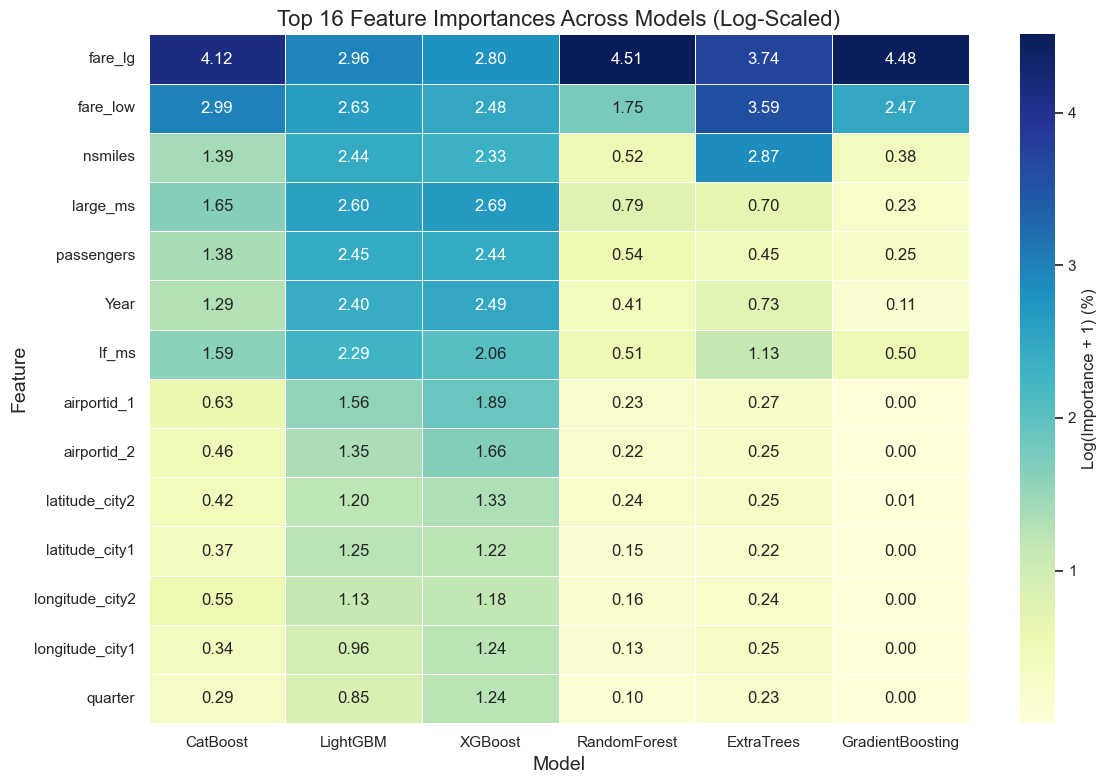

In [57]:
# Read saved importance data
percentage_df_sorted = pd.read_csv('cached_feature_importance.csv')

# Set feature names as index for cleaner axis labeling
viz_df = percentage_df_sorted.drop(columns='Average').set_index('Feature')
top_features_df = percentage_df_sorted.sort_values(by='Average', ascending=False).head(16)

# Apply log scaling to improve visibility of lower values
log_viz_df = np.log1p(viz_df)  # log1p ensures zero values stay valid

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(log_viz_df, annot=True, fmt=".2f", cmap="YlGnBu", 
            cbar_kws={'label': 'Log(Importance + 1) (%)'}, linewidths=0.5)

# Add titles and labels
plt.title("Top 16 Feature Importances Across Models (Log-Scaled)", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Feature", fontsize=14)

# Save the figure before showing
plt.tight_layout()
plt.savefig('feature_importance_heatmap.png', dpi=300, bbox_inches='tight')  # Save here
plt.show()


## 🧮 Part E. Cross Validation 

In [59]:
def get_fast_cv_results(X, y):
    models = {
        "Random Forest": RandomForestRegressor(n_jobs=-1, random_state=42),
        "XGBoost": XGBRegressor(n_jobs=-1, random_state=42, verbosity=0),
        "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
        "LightGBM": LGBMRegressor(n_jobs=-1, random_state=42),
        "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
    }

    results = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        rmse_scores = []
        r2_scores = []

        for train_idx, val_idx in kf.split(X):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
            y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train_fold, y_train_fold)
            preds = model.predict(X_val_fold)

            rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, preds)))
            r2_scores.append(r2_score(y_val_fold, preds))

        results.append({
            "Model": name,
            "Mean RMSE": np.mean(rmse_scores),
            "Std RMSE": np.std(rmse_scores),
            "Mean R²": np.mean(r2_scores),
            "Std R²": np.std(r2_scores)
        })

    return pd.DataFrame(results).sort_values(by="Mean RMSE")


In [60]:
results_df = get_fast_cv_results(X_train, y_train)
display(results_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2344
[LightGBM] [Info] Number of data points in the train set: 156379, number of used features: 14
[LightGBM] [Info] Start training from score 218.318142
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2348
[LightGBM] [Info] Number of data points in the train set: 156379, number of used features: 14
[LightGBM] [Info] Start training from score 218.444417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2343
[LightGBM] [Info] Number of data points in the train set: 156379, number of used features: 14
[LightGBM] [Info] St

,Model,Mean RMSE,Std RMSE,Mean R²,Std R²
0,Random Forest,15.885846,1.167448,0.960021,0.005725
4,CatBoost,17.480157,1.551899,0.951490,0.008541
3,LightGBM,17.805554,1.615638,0.949654,0.009119
2,HistGradientBoosting,17.836006,1.569094,0.949504,0.008848
1,XGBoost,17.854217,1.611085,0.949373,0.009113


#### 📊 Step 2 : Cross Validation Vizualization  

In [68]:
def plot_cv_scores_mean_std(results_df):
    models = results_df['Model']
    x = np.arange(len(models))

    # Colors
    rmse_colors = sns.color_palette("Blues_d", len(models))
    r2_colors = sns.color_palette("Greens_d", len(models))

    mean_rmse = results_df['Mean RMSE']
    std_rmse = results_df['Std RMSE']
    mean_r2 = results_df['Mean R²']
    std_r2 = results_df['Std R²']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot RMSE
    bars1 = ax1.bar(x, mean_rmse, yerr=std_rmse, capsize=5, color=rmse_colors)
    ax1.set_title("Mean RMSE by Model", fontsize=16)
    ax1.set_ylabel("RMSE", fontsize=12)
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, rotation=45, ha='right')

    # Plot R²
    bars2 = ax2.bar(x, mean_r2, yerr=std_r2, capsize=5, color=r2_colors)
    ax2.set_title("Mean R² by Model", fontsize=16)
    ax2.set_ylabel("R² Score", fontsize=12)
    ax2.set_xticks(x)
    ax2.set_xticklabels(models, rotation=45, ha='right')
    ax2.set_ylim(0.1, 1.05)
    ax2.set_yticks(np.arange(0.1, 1.05, 0.1))

    plt.tight_layout()
    plt.show()


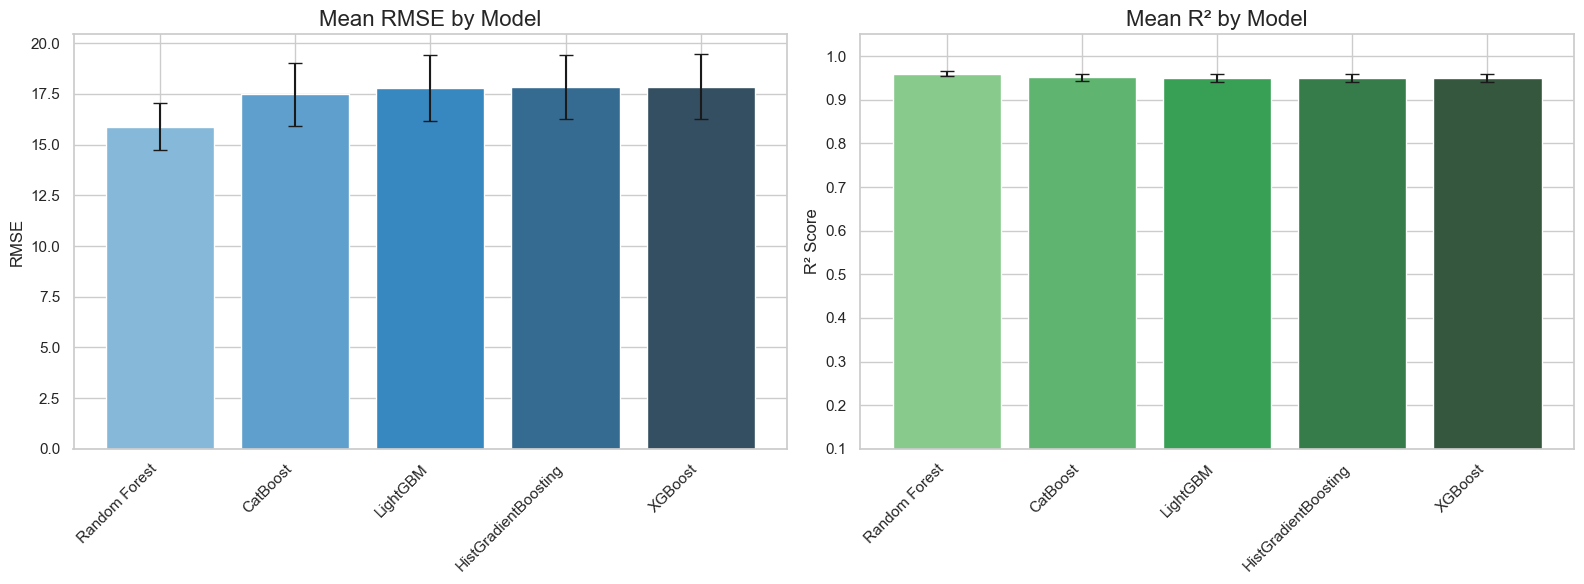

In [70]:
plot_cv_scores_mean_std(results_df)


## 🗺️ Part F: Summary
- Brief overview of data cleaning, modeling, and interpretability approach for fare prediction. 

## 📌 Business-Focused Summary

Over the past 31 years, U.S. airline fares have been influenced by many shifting factors — from competition to geography and seasonality. This analysis, based on nearly **245,000 flight records**, built a predictive framework to estimate fares using machine learning. After removing inconsistencies and cleaning the data, **tree-based models like Random Forest and XGBoost** delivered strong results, explaining over **96% of fare variability**. More importantly, models like XGBoost demonstrated better **feature distribution**, meaning their predictions weren’t over-reliant on a single factor.

This matters in real-world applications — we don’t just want accurate models; we want **explainable ones**. That’s especially true for pricing, where decisions impact customers, regulators, and airline strategies.

By investing in thoughtful preprocessing and model testing, we’ve not only achieved high accuracy but also built trust in the model’s fairness and interpretability.

---

## 📘 Technical Summary (Appendix Style)

### 🧮 Dataset Overview:
- **Initial Shape**: (245,955, 23)  
- **Final Shape After Processing**: (244,343, 17)  
- **Time Span**: 1993–2024  
- **Target Variable**: `fare`

### 🔧 Key Preprocessing Steps:
- Null value handling through domain-based imputation.
- Logical feature elimination due to redundancy or leakage.
- Outlier filtering based on domain thresholds.

### 📈 Model Performance (Linear Models):
- All models (Linear, Ridge, Lasso, ElasticNet) had **identical performance**:
  - **R²** ≈ 0.9401
  - **MAE**: 10.76
  - **RMSE**: 19.39
- **Feature Importance**: Over 54% attributed to `fare_lg`, indicating **low generalizability**.

### 🌳 Model Performance (Tree-Based):
- **ExtraTrees**: Best R² (**0.9634**), RMSE ≈ 15.14
- **XGBoost**, **CatBoost**, and **LightGBM** also performed strongly with more **balanced feature weighting**.
- **Random Forest**:
  - Best cross-validation score:
    - **Mean RMSE**: 15.88
    - **R²**: 0.96
  - But showed **extreme feature bias** (90% reliance on one feature).

### ✅ Conclusion:
While multiple models achieved high accuracy, **tree-based ensemble models**, especially **XGBoost**, offered a better tradeoff between performance and feature interpretability. The project underscores the importance of combining **robust modeling** with **clean data engineering** for meaningful predictive insights.
